# Lab 7.06 - Time series analysis

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

/tmp/ipykernel_91526/2839152206.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


## Exercise 6: COVID-19 data


In this lab assignment, we will make use of the COVID-19 dataset maintained by [Our World in Data](https://ourworldindata.org/coronavirus), published on Github at <https://github.com/owid/covid-19-data/tree/master/public/data>.

First, we import the dataset, parse the `date` column as the Python `DateTime` type and set this as the index:

In [22]:
covid19 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data-old.csv', parse_dates=['date']).set_index(['date'])
# when reading the csv you could add a filter to only use certain columns:
# usecols=["iso_code","date","new_cases"]
covid19.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.122,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Create a new `DataFrame` (with name e.g. `covid19_be`) that only contains the new cases in Belgium and use the `plot()` method of `DataFrame` to visualize it. Increase the size of the picture with the `figsize` parameter, otherwise it will be too small.

In [29]:
# veel kolommen id dataset, dus enkel uithalen & filteren
covid19_be = covid19[covid19.iso_code=='BEL'][['new_cases']]
covid19_be.head()

,new_cases
date,
2020-02-04,1.0
2020-02-05,0.0
2020-02-06,0.0
2020-02-07,0.0
2020-02-08,0.0


<Axes: xlabel='date'>

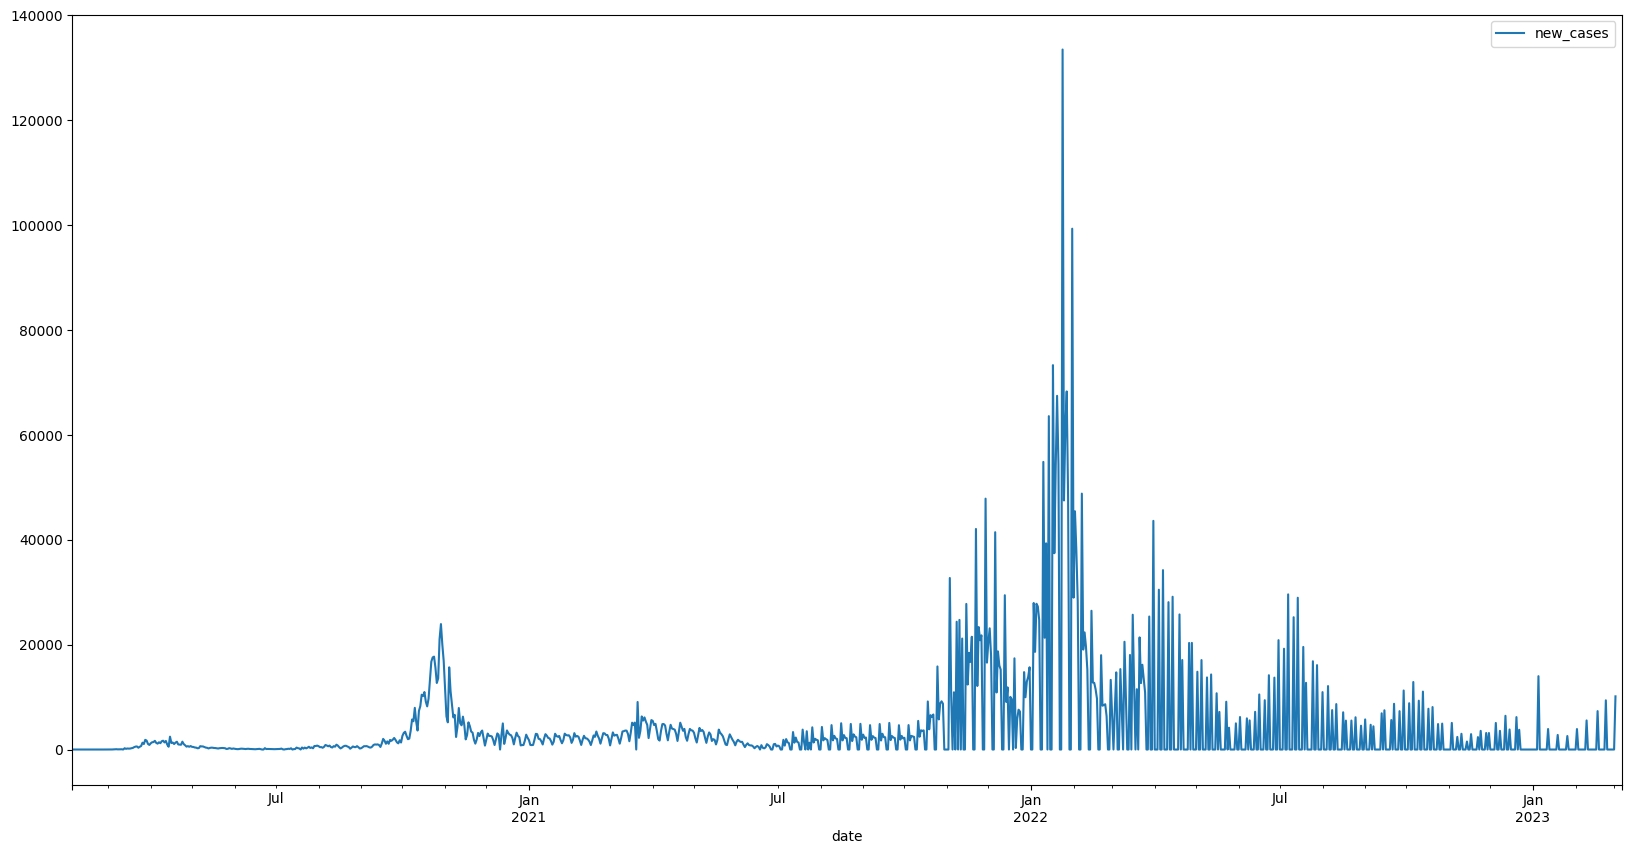

In [30]:
covid19_be.plot(y='new_cases', figsize=[20,10])

### Moving average

Add new columns to the data frame with new cases in Belgium with the simple moving average for 7 and 30 days. Plot the entire data frame (observations and both moving averages).

In [33]:
covid19_be['SMA7'] = covid19_be['new_cases'].rolling(7).mean()
covid19_be['SMA30'] = covid19_be['new_cases'].rolling(30).mean()
covid19_be.head(50)

,new_cases,SMA7,SMA30
date,,,
2020-02-04,1.0,NaN,NaN
2020-02-05,0.0,NaN,NaN
2020-02-06,0.0,NaN,NaN
2020-02-07,0.0,NaN,NaN
2020-02-08,0.0,NaN,NaN
2020-02-09,0.0,NaN,NaN
2020-02-10,0.0,0.142857,NaN
2020-02-11,0.0,0.000000,NaN
2020-02-12,0.0,0.000000,NaN


<Axes: xlabel='date'>

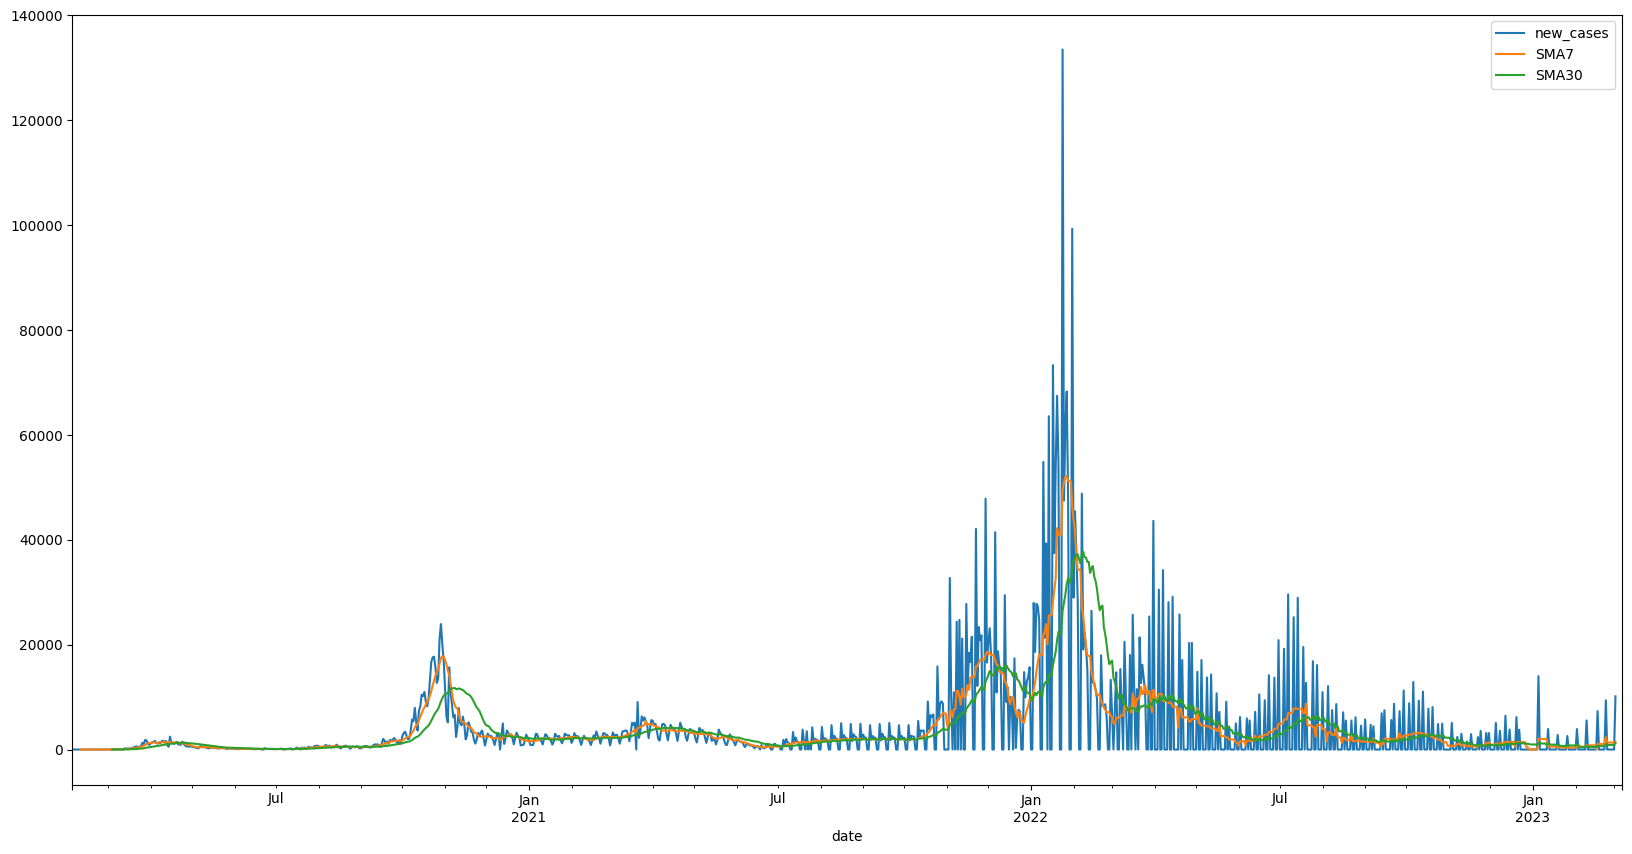

In [35]:
covid19_be.plot(y=['new_cases','SMA7','SMA30'],figsize=[20,10])

### Holt-Winters model for new cases early 2021

The period from about December 2020 up to the end of February 2021 seems quite regular. Create a new `DataFrame` and select only the observations during that period (1 December 2020 to 28 February 2021). Plot the `DataFrame` (it will still contain the moving averages from the previous step).

<Axes: xlabel='date'>

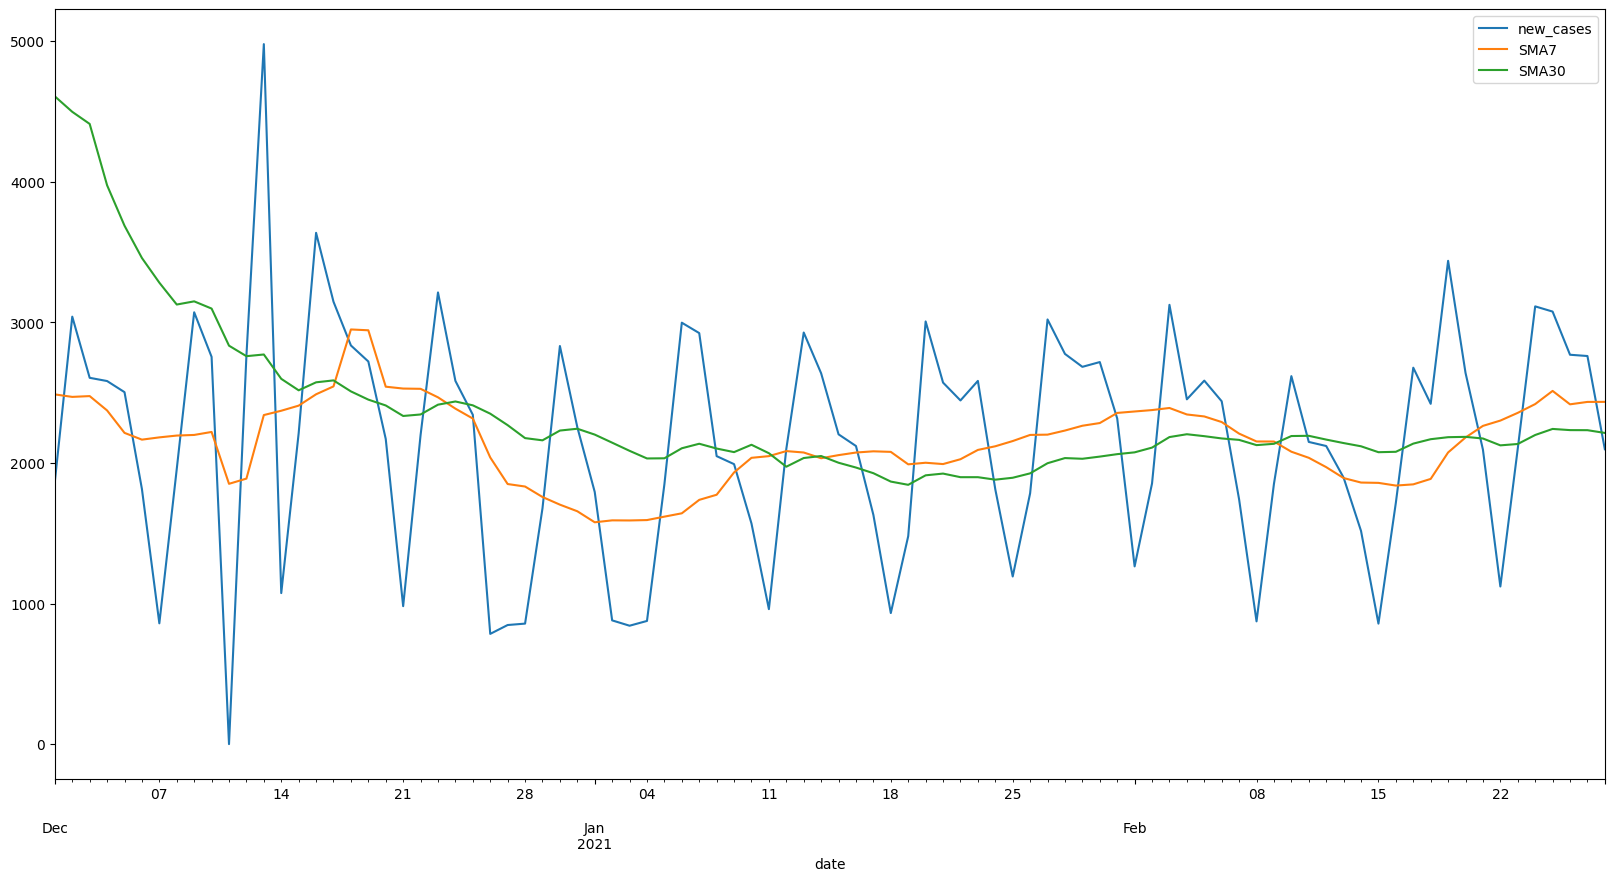

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Slicing
covid2 = covid19_be['2020-12-01':'2021-02-28']
covid2.head()
covid2.plot(y=['new_cases','SMA7','SMA30'],figsize=[20,10])



Build a Holt-Winters model for the observed new cases during that period.

Use the additive type for both trend and seasonal smoothing. Set the value for `seasonal_periods` to the appropriate value! Plot the observed and fitted values.

<Axes: xlabel='date'>

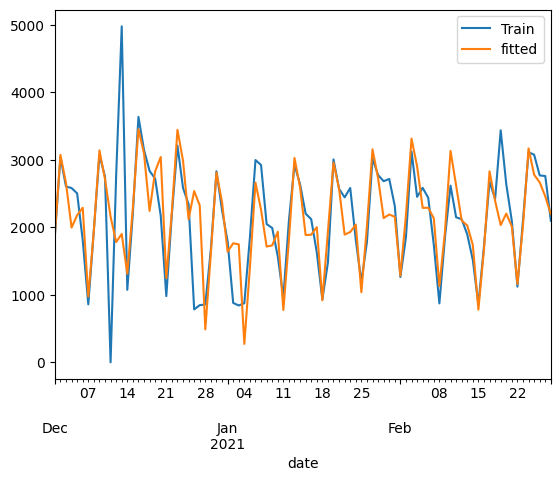

In [40]:
train = covid2['new_cases']
#seasonal is nu 7dagen (week), frequency = 'D' days
covid2_hw = ExponentialSmoothing(train, trend='add', seasonal='add',
                                 seasonal_periods=7, freq='D').fit()

train.plot(legend=True, label='Train')
covid2_hw.fittedvalues.plot(legend=True, label='fitted')

Now, make a forecast for 21 days and plot observed and forecasted values. What do you notice when you compare observed and forecasted values as time progresses?

<Axes: xlabel='date'>

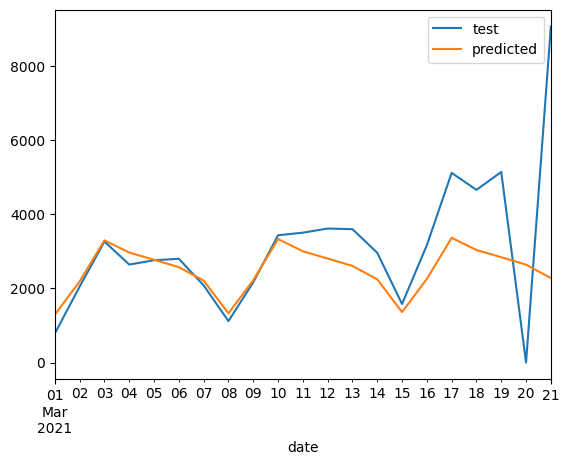

In [45]:
covid_predicted = covid2_hw.forecast(21)
test = covid19_be['2021-03-01':'2021-03-21']
test['new_cases'].plot(legend=True, label='test')
covid_predicted.plot(legend=True, label='predicted')

### Evaluating model quality


- Calculate the Mean Squared Error for a forecast period of 7 days, and compare its square root with the standard deviation of observed new cases over the test period and forecasted period combined.
- Do the same for a forecast period of 14 and 21 days.
- For which period is the quality of the forecast ok?

The expected results are shown in the table below:

|     Forecast period      |         MSE |     √MSE |    stdev |
| :----------------------: | ----------: | -------: | -------: |
| 2021-03-01 to 2021-03-07 |   25408.902 |  159.402 |  855.684 |
| 2021-03-01 to 2021-03-14 |  154280.817 |  392.786 |  895.531 |
| 2021-03-01 to 2021-03-21 | 1048835.781 | 1024.127 | 1052.978 |

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

for x, y in zip((7, 14, 21),('2021-03-07','2021-03-14','2021-03-21')):
    covid_predicted = covid2_hw.forecast(x)
    test = covid19_be['2021-03-01':y]
    print(f'√MSE {x} dagen = {np.sqrt(mean_squared_error(test["new_cases"],covid_predicted))}')
    print(f'stdev {x} dagen = {test["new_cases"].std()}')

√MSE 7 dagen = 254.19917327731156
stdev 7 dagen = 806.9221358553335
√MSE 14 dagen = 456.08650403544914
stdev 14 dagen = 895.6540982635337
√MSE 21 dagen = 1796.8957073903046
stdev 21 dagen = 1893.7697489147836


### ICU patients

Create a new `DataFrame` with only the total number of ICU (intensive care units) patients in the Belgian hospitals. Make sure that all NaN's are removed, since time series analysis functions can't cope with missing values. Plot this time series. 

In [3]:
# Filtering columns via usecols:
covid19 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data-old.csv', parse_dates=['date'],usecols=["date","iso_code","icu_patients"]).set_index(['date'])
covid19.head()

,iso_code,icu_patients
date,,
2020-02-24,AFG,NaN
2020-02-25,AFG,NaN
2020-02-26,AFG,NaN
2020-02-27,AFG,NaN
2020-02-28,AFG,NaN


In [4]:
#Add filter for belgium
covid19_be = covid19[covid19.iso_code=='BEL']
covid19_be = covid19_be[['icu_patients']]
#drop all rows with NAN
covid19_be = covid19_be.dropna()
covid19_be.head()

,icu_patients
date,
2020-03-15,53.0
2020-03-16,79.0
2020-03-17,100.0
2020-03-18,130.0
2020-03-19,164.0


<Axes: xlabel='date'>

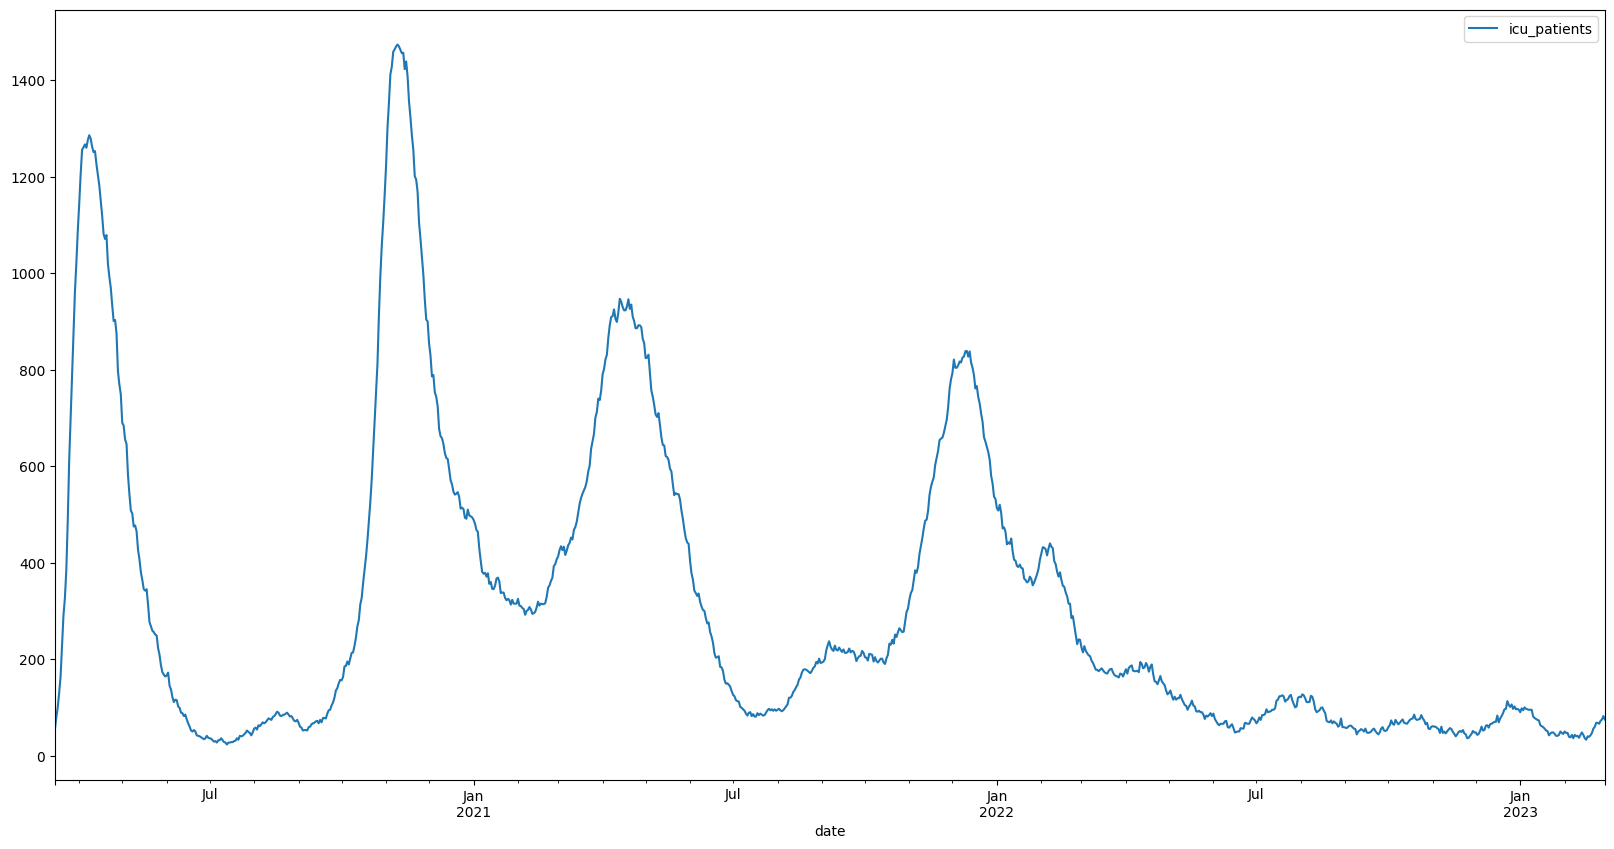

In [5]:
covid19_be.plot(y='icu_patients',figsize=[20,10])

Build a duible exponential smoothing (Holt) model of this time series. Make a forecast of 70 time units and plot the observations, fitted values and forecast.

Are we currently in an upward or downward trend, according to this model? Do the forecasted values seem reasonable if you look at the last period?

In [6]:
from statsmodels.tsa.api import Holt
#datamodel bouwen
#als we geen waarde voor alpha & beta hebben, dan gaat het model deze zelf zo goed mogelijk schatten
data_des = Holt(covid19_be['icu_patients']).fit()

covid19_be['fittedvalues'] = data_des.fittedvalues
covid19_be.head()

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,icu_patients,fittedvalues
date,,
2020-03-15,53.0,79.000000
2020-03-16,79.0,70.735099
2020-03-17,100.0,98.185628
2020-03-18,130.0,120.136440
2020-03-19,164.0,153.353992


<Axes: xlabel='date'>

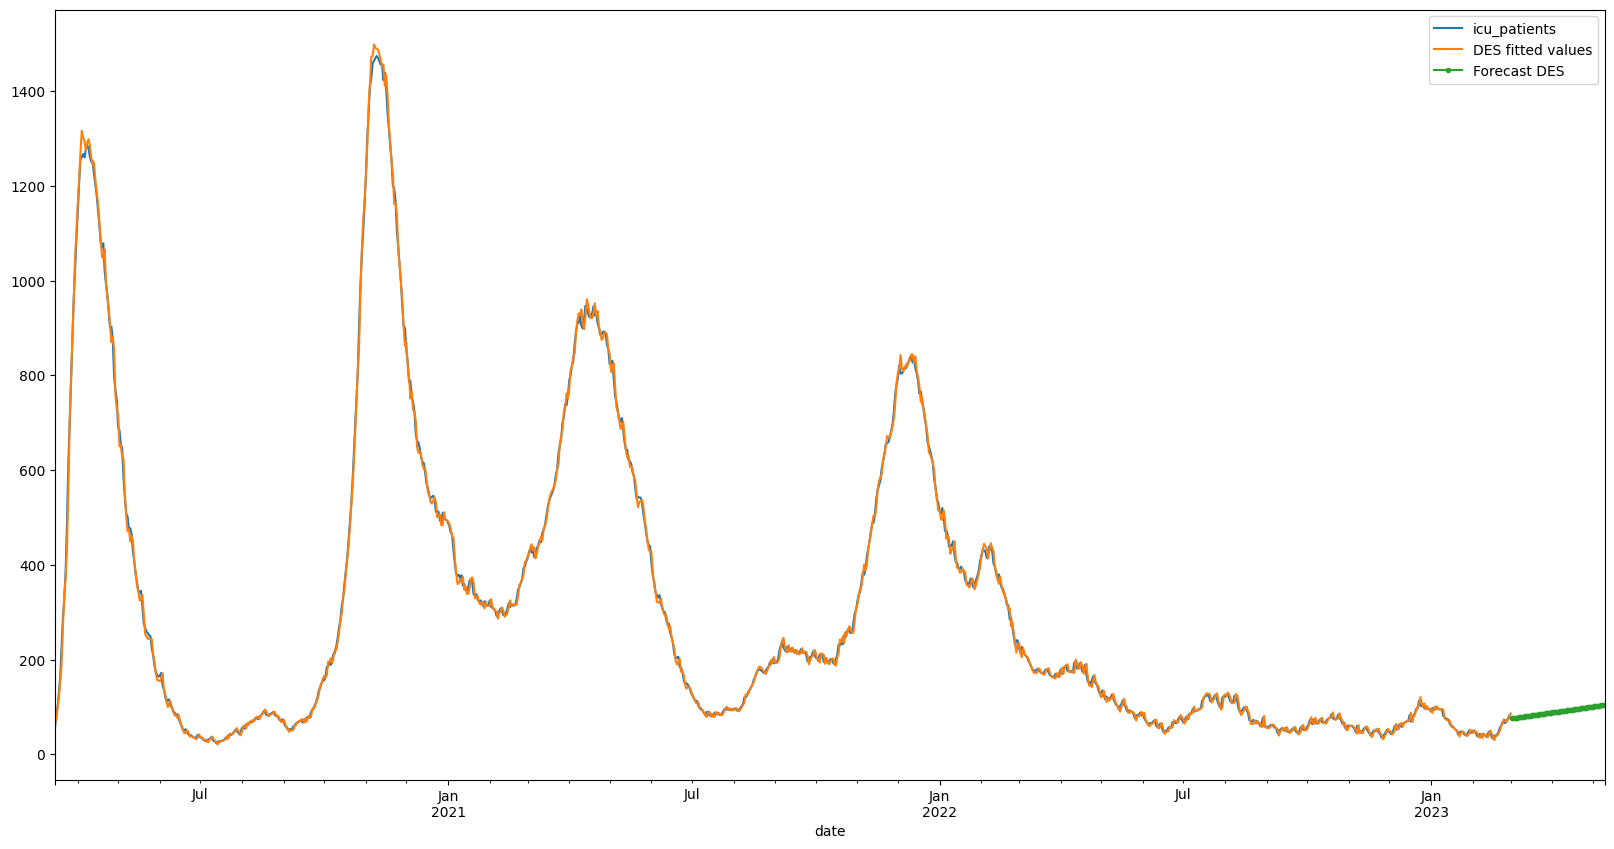

In [7]:
data_des_forecast = data_des.forecast(70)

covid19_be['icu_patients'].plot(legend=True) #observations
covid19_be['fittedvalues'].plot(legend=True,label='DES fitted values',figsize=[20,10])
data_des_forecast.plot(marker='.',legend=True, label='Forecast DES')

In [ ]:
# Forecast is trending up

Since we didn't set any initial parameters like $\alpha$ and $\beta$, the model calculated them using some rule of thumb. List these parameters from the model:

In [8]:
data_des.params_formatted
# model kies waarde alpha en beta
# zeer hoge waarde van alpha (dicht bij 1), vandaar dat blauwe en oranje lijn elkaar bijna overlappen


,name,param,optimized
smoothing_level,alpha,0.954741,True
smoothing_trend,beta,0.380354,True
initial_level,l.0,53.000000,False
initial_trend,b.0,26.000000,False


In [9]:
data_des.trend
# trend is 0.4 en is licht stijgend; trend fluctueert wel hard. Maar hij neemt de laatste trend

date
2020-03-15    16.558374
2020-03-16    19.559686
2020-03-17    20.218556
2020-03-18    23.800404
2020-03-19    27.666389
                ...    
2023-02-25     1.613224
2023-02-26     3.106247
2023-02-27     3.135237
2023-02-28     4.539997
2023-03-01     0.412946
Length: 1082, dtype: float64

What were the final estimated values for the level and trend, that are used in the forecast? In other words, what are the parameters of the line that estimates future observations?

In [ ]:
# alpha & beta zelf instellen op 0.1

Let's try to set the parameters ourselves. Recreate the Holt-model with $\alpha = \beta = 0.1$. Calculate a forecast like before and plot.

In [11]:
from statsmodels.tsa.api import Holt
alpha = 0.1
beta= 0.1
#datamodel bouwen
#als we geen waarde voor alpha & beta hebben, dan gaat het model deze zelf zo goed mogelijk schatten
data_des = Holt(covid19_be['icu_patients']).fit(smoothing_level = alpha, smoothing_trend=beta)

covid19_be['fittedvalues'] = data_des.fittedvalues
covid19_be.head()

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,icu_patients,fittedvalues
date,,
2020-03-15,53.0,79.000000
2020-03-16,79.0,102.140000
2020-03-17,100.0,125.334600
2020-03-18,130.0,148.056394
2020-03-19,164.0,171.325445


<Axes: xlabel='date'>

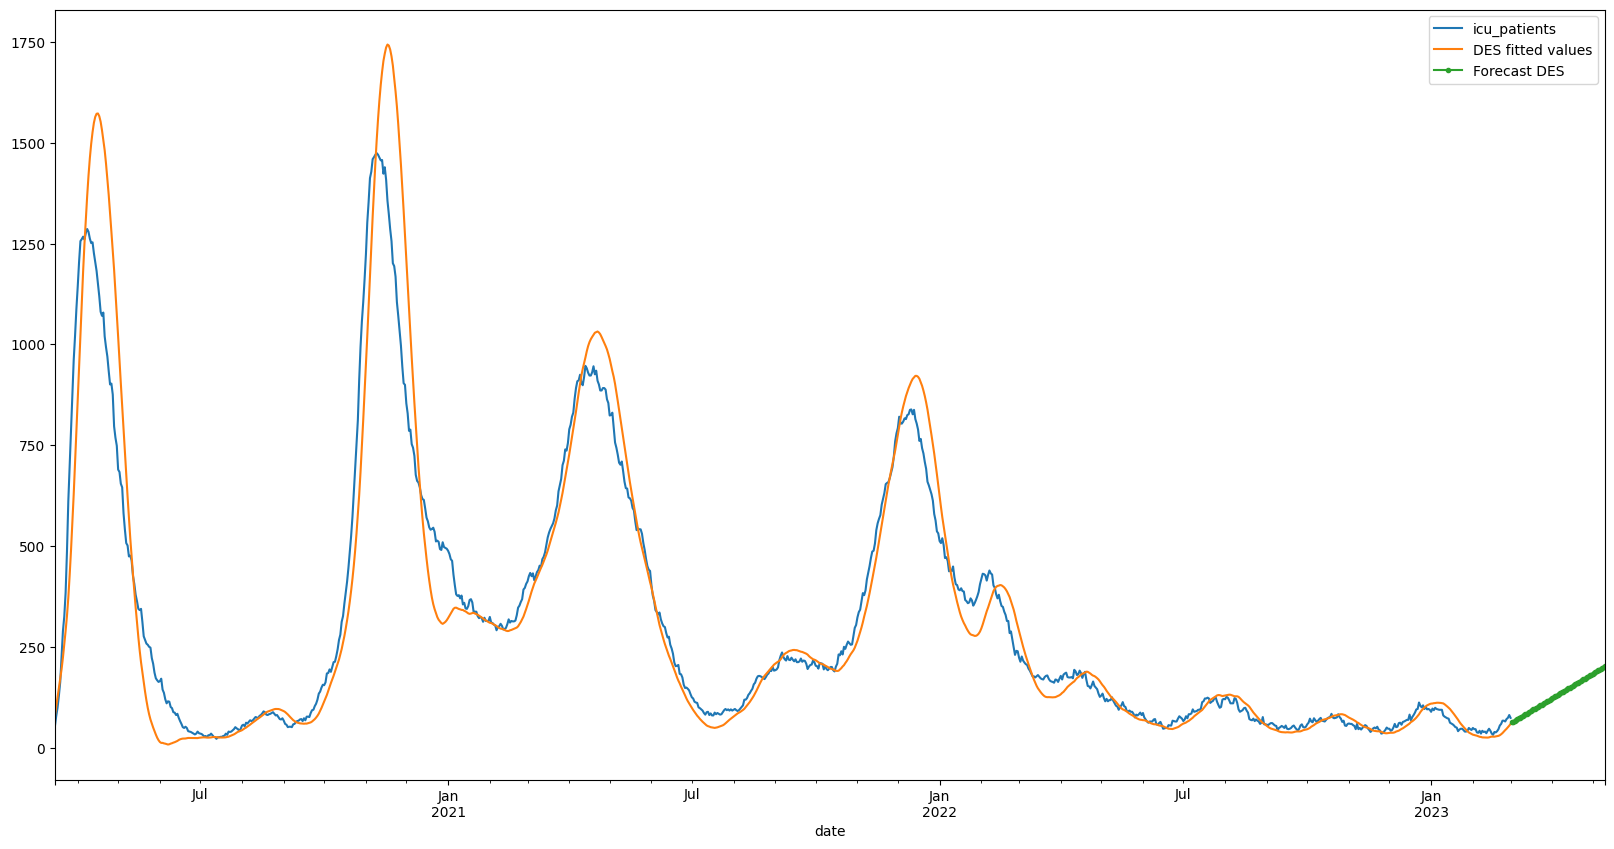

In [12]:
data_des_forecast = data_des.forecast(70)

covid19_be['icu_patients'].plot(legend=True) #observations
covid19_be['fittedvalues'].plot(legend=True,label='DES fitted values',figsize=[20,10])
data_des_forecast.plot(marker='.',legend=True, label='Forecast DES')

In [13]:
data_des.params_formatted


,name,param,optimized
smoothing_level,alpha,0.1,False
smoothing_trend,beta,0.1,False
initial_level,l.0,53.0,False
initial_trend,b.0,26.0,False


In [14]:
data_des.trend
#Trend = 2, dus forecast gaat steiler omhoog.


date
2020-03-15    25.740000
2020-03-16    25.508600
2020-03-17    25.255254
2020-03-18    25.074690
2020-03-19    25.001436
                ...    
2023-02-25     1.123917
2023-02-26     1.365074
2023-02-27     1.598465
2023-02-28     1.862532
2023-03-01     2.011567
Length: 1082, dtype: float64

Compare the model parameters and final estimates. Which of the two forecast models seems to perform best if you look at the plots?